# Correlations in Two Photon Data

In [1]:
# This will ensure that the AllenSDK is installed.
# If not, it will install it for you.
try:
    import allensdk
    print('allensdk already installed.')
except ImportError as e:
    !pip install allensdk

allensdk already installed.


In [4]:
# Import toolboxes
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import numpy as np
import pandas as pd
import scipy as sp

# Plotting setup
%config InlineBackend.figure_format = 'retina' # Improve the resolution of our plots!
%matplotlib inline
import matplotlib.pyplot as plt
print('Packages imported.')

Packages imported.


As a final setup step, we need to once again create an instance of the Brain Observatory Cache as an object, `boc`.

In [3]:
# Create an instance of the Brain Observatory cache
boc = BrainObservatoryCache(manifest_file='manifest.json')

In [9]:
# Assign previous container ID
exp_container_id = 627823571
stim = 'natural_scenes'

# Get experiments for our container id and stimuli of interest
experiments = boc.get_ophys_experiments(experiment_container_ids = [exp_container_id],
                                     stimuli = [stim])

# Assign the experiment id 
experiment_id = experiments[0]['id']

# Import the natural scenes analysis
ns = boc.get_ophys_experiment_analysis(ophys_experiment_id= experiment_id, 
                                       stimulus_type= stim)

# Get the signal correlation
sc = ns.signal_correlation

print('Signal correlation acquired.')

/Users/VictorMagdaleno/opt/anaconda3/lib/python3.7/site-packages/allensdk/brain_observatory/natural_scenes.py:391: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ns._response = f["analysis/response_ns"].value
/Users/VictorMagdaleno/opt/anaconda3/lib/python3.7/site-packages/allensdk/brain_observatory/natural_scenes.py:392: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ns._binned_dx_sp = f["analysis/binned_dx_sp"].value
/Users/VictorMagdaleno/opt/anaconda3/lib/python3.7/site-packages/allensdk/brain_observatory/natural_scenes.py:393: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ns._binned_cells_sp = f["analysis/binned_cells_sp"].value
/Users/VictorMagdaleno/opt/anaconda3/lib/python3.7/site-packages/allensdk/brain_observatory/natural_scenes.py:394: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ns._binned_dx_vis = f["analysis/binned_

Signal correlation acquired.


Text(0, 0.5, 'Cell #')

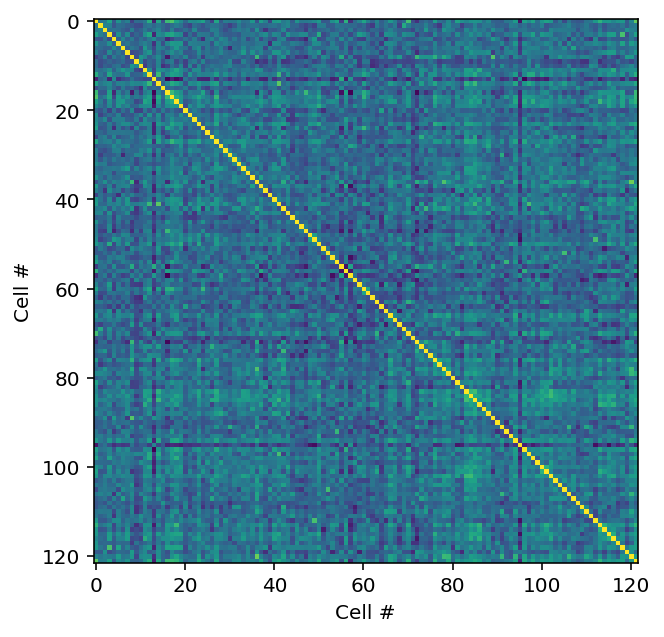

In [10]:
plt.figure(figsize = [5, 5])

plt.imshow(sc)
plt.xlabel('Cell #')
plt.ylabel('Cell #')

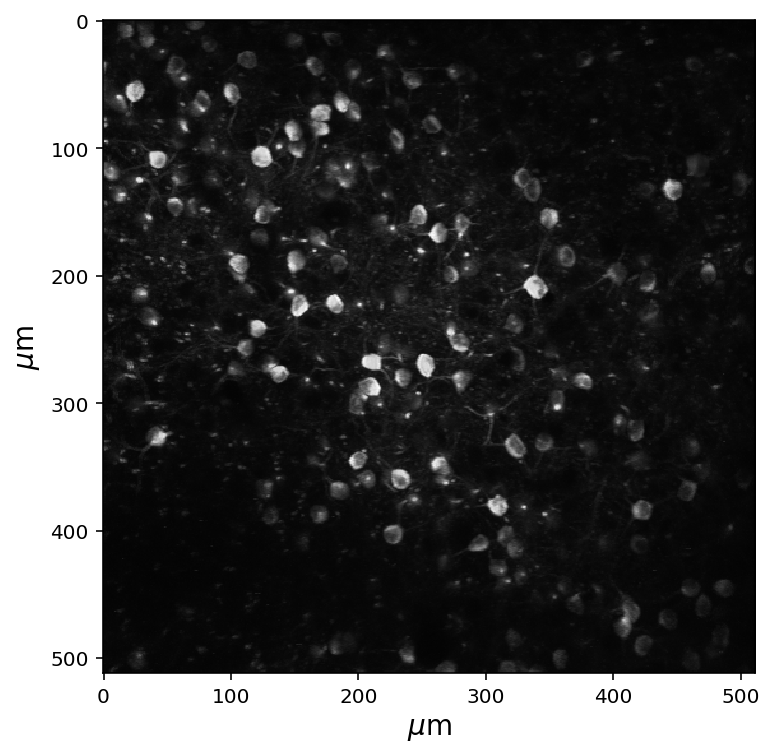

In [12]:
# Get the max projection of the data and show it
fig = plt.figure(figsize=(6,6))

data_set = boc.get_ophys_experiment_data(ophys_experiment_id= experiment_id)
max_proj = data_set.get_max_projection()
plt.imshow(max_proj, cmap='gray')

# Add labels for microns; weird syntax below is to get the micro sign
plt.ylabel(r'$\mu$m',fontsize=14)
plt.xlabel(r'$\mu$m',fontsize=14)
plt.show()

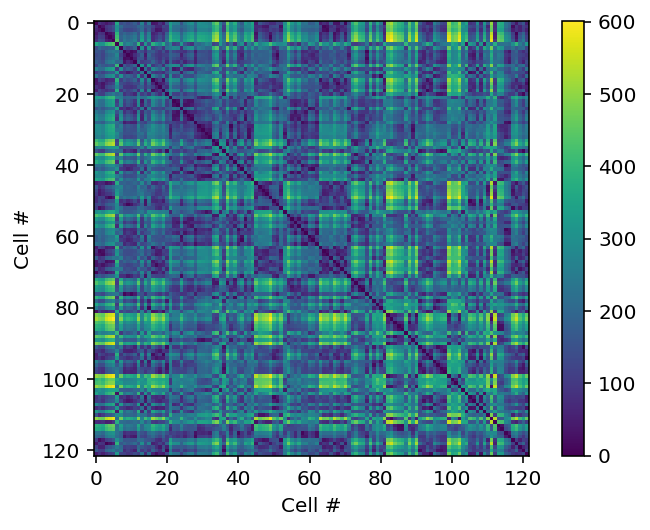

In [13]:
rois = data_set.get_roi_mask_array()

num_cells = rois.shape[0]
loc_x = np.zeros((num_cells))
loc_y = np.zeros((num_cells))

for i in range(num_cells):
    ind = np.where(rois[i])
    loc_x[i] = np.mean(ind[1])
    loc_y[i] = np.mean(ind[0])

distance = np.zeros((num_cells, num_cells))
for i in range(num_cells):
    for j in range(num_cells):
        distance[i, j] = np.sqrt( (loc_x[i]-loc_x[j])**2 + (loc_y[i]-loc_y[j])**2 )

# Plot the distance matrix
plt.imshow(distance, cmap='viridis', interpolation='none')
plt.xlabel("Cell #")
plt.ylabel("Cell #")
plt.colorbar()
plt.show()

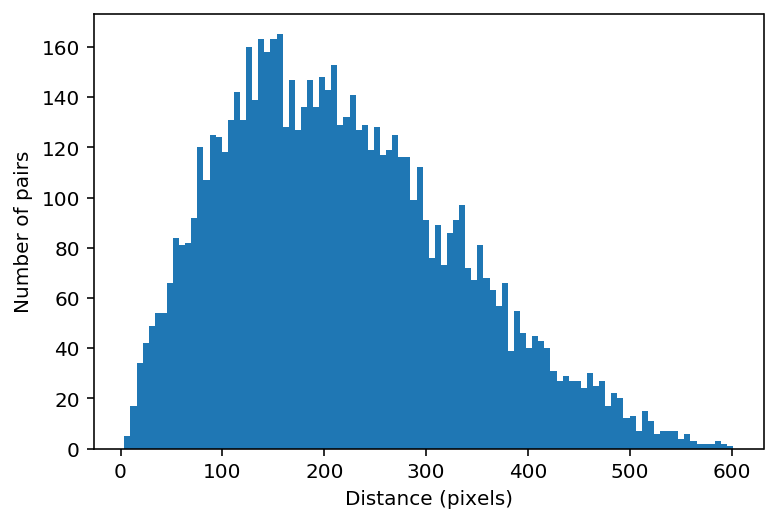

In [14]:
inds = np.triu_indices(num_cells, k=1)
distance_vector = distance[inds[0], inds[1]]
plt.hist(distance_vector, bins=100)
plt.xlabel("Distance (pixels)")
plt.ylabel("Number of pairs")
plt.show()